# U2.4 Logistic regression

# Index

1. One-hot encoding and categorical distribution
2. Probabilistic classification model with softmax
3. Logistic regression
4. Learning by maximum likelihood
5. Learning algorithm with gradient descent

# 1 One-hot encoding and categorical distribution

**Categorical variable:** $\;$ random variable that takes a value from a finite set of (unordered) categories

**Examples of categorical variables:** $\;$ RGB color, **class label,** vocabulary word, etc.

**One-hot encoding:** $\;$ of a categorical variable $y$ that takes a value among $C$ possible, $\,\{1,\dotsc,C\}$
$$\operatorname{one-hot}(y)%
=\boldsymbol{y}%
=\begin{pmatrix}y_1\\\vdots\\y_C\end{pmatrix}%
=\begin{pmatrix}\mathbb{I}(y=1)\\\vdots\\\mathbb{I}(y=C)\end{pmatrix}\in\{0,1\}^C%
\quad\text{with}\quad%
\sum_c y_c=1$$

**Categorical distribution:** $\;$ distribution of probabilities among the $C$ possible categories of a categorical variable, whose probabilities are given by a parameter vector $\,\boldsymbol{\theta}\in[ 0,1]^C\,$ such that $\,\sum_c\theta_c=1$
$$\operatorname{Cat}(y\mid\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{\mathbb{I}(y=c)}%
\qquad\text{or, in one-hot notation,}\qquad%
\operatorname{Cat}(\boldsymbol{y}\mid\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{y_c}$$

**Convention:** $\;0^0=1\;$ and $\;0\log 0=0;\;$ for example, with $\,\boldsymbol{\theta}=(0.5, 0.5, 0)^t,\,\operatorname{Cat}(\boldsymbol{y}=(1,0,0)^t\mid\boldsymbol{\theta})=0.5^10.5^00^0=0.5$

# 2 Probabilistic classification model with softmax

**Probabilistic normalization of classifiers:** $\;$ every classifier defined with general discriminant functions can be represented by an equivalent classifier with probabilistically normalized discriminant functions
$$\begin{align*}
c(\boldsymbol{x})%
&=\operatorname*{argmax}\limits_c\;a_c && \text{where $\,a_c\,$ is the discriminant of class $c$ evaluated at $\boldsymbol{x}$}\\%
&=\operatorname*{argmax}\limits_c\;e^{a_c} && \text{with}\;h(z)=e^z\in\mathbb{R}^{\geq 0}\;\text {strictly increasing}\\%
&=\operatorname*{argmax}\limits_c\;\frac{e^{a_c}}{\sum_{c'} e^{a_{c'}}} && \text{with}\;h(z) =kz,\,k\;\text{positive constant (invariant with $c$)}%
\end{align*}$$

**The softmax function:** $\;$ transforms a vector of **logits** (non-normalized log-likelihoods) $\,\boldsymbol{a}\in\mathbb{R}^C\,$ into a vector of probabilities $[0,1]^C$
$$\mathcal{S}(\boldsymbol{a})=\left[%
\frac{e^{a_1}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}},\dotsc,%
\frac{e^{a_C}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}}\right]%
\qquad\text{satisfying}\qquad%
0\leq\mathcal{S}(\boldsymbol{a})_c\leq 1%
\quad\text{and}\quad%
\sum_c \mathcal{S}(\boldsymbol{a})_c=1$$

**Probabilistic classification model with softmax:** $\;$ instead of predicting a single most likely class, we predict the probabilities of all classes from a logit predictor function, $\,f:\mathcal{ X}\to\mathbb{R}^C,\,$ governed by a parameter vector $\,\boldsymbol{\theta}$
$$p(\boldsymbol{y}\mid\boldsymbol{x},\boldsymbol{\theta})%
=\operatorname{Cat}(\boldsymbol{y}\mid\mathcal{S}(f(\boldsymbol{x};\boldsymbol{\theta})))%
=\prod_c(\mathcal{S}(f(\boldsymbol{x};\boldsymbol{\theta}))_c)^{y_c}$$

**Convenience of the model in inference:** $\;$ the prediction of the probabilities of all classes allows to apply more general rules than the MAP, for example in case of errors with different costs; also, if we want to apply the MAP rule, we do not need to softmax-normalize logits

**Convenience of the model in learning:** $\;$ allows learning to be considered probabilistically, with standard criteria such as maximum likelihood; moreover, thanks to the softmax, $\,f(\boldsymbol{x};\boldsymbol{\theta})\,$
can be freely chosen since it is not subject to probabilistic restrictions

# 3 Logistic regression

**Logistic regression:** $\;$ model with softmax and **linear logits** with input (in homogeneous notation)
$$p(\boldsymbol{y}\mid\boldsymbol{x},\mathbf{W})%
=\operatorname{Cat}(\boldsymbol{y}\mid\boldsymbol{\mu})%
\quad\text{with}\quad%
\boldsymbol{\mu}=\mathcal{S}(\boldsymbol{a}),\quad%
\boldsymbol{a}=f(\boldsymbol{x};\mathbf{W})=\mathbf{W}^t\boldsymbol{x},\quad%
\mathbf{W}\in\mathbb{R}^{D\times C}\quad\text{and}\quad\boldsymbol{x}\in\mathbb{R}^D$$

**Difference with linear discriminant based classifiers:** $\;$ none, except that now we predict all class probabilities

**Example (perceptron cont.):** $\quad C=D=2,\quad a_1=g_1(x_1,x_2)=-x_1-x_2+1,\quad a_2=g_2(x_1,x_2)= x_1+x_2-1$
$$\boldsymbol{a}=f(\boldsymbol{x};\mathbf{W})=\mathbf{W}^t\boldsymbol{x}%
\quad\text{with}\quad%
\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}%
\quad\text{and}\quad%
\boldsymbol{x}=\begin{pmatrix}1\\x_1\\x_2\end{pmatrix}$$

<center>

|$\boldsymbol{x}^t$|$\boldsymbol{a}^t$|$\mu_1=\mathcal{S}(\boldsymbol{a})_1$|$\mu_2=\mathcal{S}( \boldsymbol{a})_2$|
|:-:|:-:|:-:|:-:|
|$(1,0,0)$|$(1,-1)$|$\frac{e^1}{e^1+e^{-1}}=0.8808$|$\frac{e^{-1}}{e^1+e^{-1}}=0.1192$|
|$(1,1,1)$|$(-1,1)$|$\frac{e^{-1}}{e^{-1}+e^1}=0.1192$|$\frac{e^1}{e^{-1}+e^1}=0.8808$|
|$(1,0.5,0.5)$|$(0,0)$|$\frac{e^0}{e^0+e^0}=0.5000$|$\frac{e^0}{e ^0+e^0}=0.5000$|

</center>

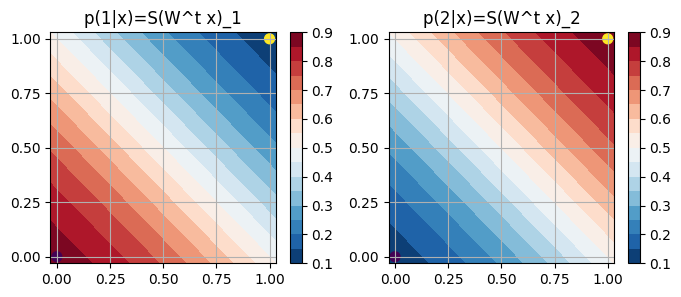

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 1]]).astype(float); y = np.array([1, 2]).astype(int)
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
Wt = np.array([[1, -1, -1], [-1, 1, 1]]).astype(float)
P = lambda x: (np.exp(Wt[0, 0] + Wt[0, 1:] @ x), np.exp(Wt[1, 0] + Wt[1, 1:] @ x))
PP = np.apply_along_axis(P, 1, XX); PP = PP/PP.sum(axis=1, keepdims=True)
_, axs = plt.subplots(1, 2, figsize=(8, 3))
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(0., 1, 5)); ax.set_yticks(np.linspace(0., 1, 5));
    ax.grid(); ax.set_title(f'p({i+1}|x)=S(W^t x)_{i+1}')
    cp = ax.contourf(x1, x2, PP[:, i].reshape(x1.shape), 15, cmap='RdBu_r')
    plt.colorbar(cp, ax=ax); ax.scatter(*X.T, c=y, s=50);

# 4 Learning by maximum likelihood

**Purpose:** $\;$ establish a criterion for learning $\,\mathbf{W}\,$ from a training dataset, $\,\mathcal{D}=\{ (\boldsymbol{x}_n,\boldsymbol{y}_n)\}_{n=1}^N$

## Learning by maximum likelihood

**Log-likelihood (conditional):** $\;$ log-likelihood of $\,\mathcal{D}\,$ interpreted as a function of $\,\mathbf{W}$
$$\begin{align*}
\operatorname{LL}(\mathbf{W})%
&=\log p(\mathcal{D}\mid\mathbf{W})=\log \prod_{n=1}^N p(\boldsymbol{y}_n\mid\boldsymbol{x}_n,\mathbf {W})\\%
&=\sum_{n=1}^N \log \operatorname{Cat}(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)%
\qquad\text{with}\quad\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)\quad\text{and}\quad\boldsymbol{a}_n=\mathbf{W }^t\boldsymbol{x}_n\\%
&=\sum_{n=1}^N \log\prod_{c=1}^C \mu_{nc}^{y_{nc}}=\sum_{n=1}^N\sum_{c=1 }^C y_{nc}\log\mu_{nc}%
\end{align*}$$

**Example (cont.):** $\;$ log-likelihood of $\;\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}\; $ with $\;\mathcal{D}=\{((1,0,0)^t,(1,0)^t),((1,1,1)^t,(0,1)^ t)\}$
$$\begin{align*}
\operatorname{LL}(\mathbf{W})%
&=y_{11}\log\mu_{11}+y_{12}\log\mu_{12}+y_{21}\log\mu_{21}+y_{22}\log\mu_{22}\\
&=\log\mu_{11}+\log\mu_{22}\\
&=\log 0.8808+\log 0.8808=-0.1269-0.1269=-0.2538
\end{align*}$$

**Learning by maximum likelihood:** $\;$ choose a $\,\mathbf{W}\,$ that gives maximum likelihood to $\,\mathcal{D}$
$$\mathbf{W}^*=\operatorname*{argmax}_{\mathbf{W}}\;\operatorname{LL}(\mathbf{W})$$

## Considered as a minimization problem

**Neg-log-likelihood:** $\;$ log-likelihood with the sign changed and normalized by the number of data samples
$$\operatorname{NLL}(\mathbf{W})%
=-\frac{1}{N}\operatorname{LL}(\mathbf{W})%
=-\frac{1}{N}\sum_{n=1}^N\sum_{c=1}^C y_{nc}\log\mu_{nc}%
\qquad\text{with}\quad%
\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)%
\quad\text{and}\quad%
\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n$$

**Example (cont.):** $\;$ neg-log-likelihood of $\;\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix} \;$ with $\;\mathcal{D}=\{((1,0,0)^t,(1,0)^t),((1,1,1)^t,(0,1 )^t)\}$
$$\operatorname{NLL}(\mathbf{W})=-\frac{1}{2}\operatorname{LL}(\mathbf{W})=0.1269$$

**Empirical risk with log-loss:** $\;$ is the same as the NLL
$$\mathcal{L}(\mathbf{W})%
=\frac{1}{N}\sum_{n=1}^N\ell(\boldsymbol{y}_n,\hat{\boldsymbol{y}}_n)%
=\operatorname{NLL}(\mathbf{W})%
\quad\text{with}\quad%
\ell(\boldsymbol{y}_n,\hat{\boldsymbol{y}}_n)%
=-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)%
=-\sum_{c=1}^C y_{nc}\log\mu_{nc}$$
* If the model assigns probability one to the correct class, the loss is zero;
* If not, the loss will be positive and will be greater when the probability assigned to the correct class is lower

**Learning by minimum NLL:** $\;$ learning by maximum likelihood posed as a minimization problem
$$\mathbf{W}^*=\operatorname*{argmin}_{\mathbf{W}}\;\operatorname{NLL}(\mathbf{W})$$

**Example (cont.):** $\;\mathcal{D}=\{((1,0,0)^t,(1,0)^t),((1,1,1)^ t,(0,1)^t)\};\;$ for simplicity, suppose we have to choose for minimum NLL between
$$\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}%
\qquad\text{and}\qquad%
\tilde{\mathbf{W}}^t=\begin{pmatrix}-1&1&1\\1&-1&-1\end{pmatrix}$$
We choose $\mathbf{W}$ since its NLL, $0.1269$ (calculated before), is smaller than that of $\,\tilde{\mathbf{W}}:$
$$\operatorname{NLL}(\tilde{\mathbf{W}})%
=-\frac{1}{2}(\log\tilde{\mu}_{11}+\log\tilde{\mu}_{22})%
=-\log\frac{e^{-1}}{e^{-1}+e^1}=\log(1+e^2)=2.1269$$

# 5 Learning algorithm with gradient descent

**Purpose:** $\;$ unlike empirical risk with loss 01 (training error rate), empirical risk with log-loss (NLL) is differentiable, so we can minimize it with standard optimization techniques such as gradient descent

## Gradient descent

**Gradient descent:** $\;$ iterative algorithm to minimize an objective $\,\mathcal{L}(\boldsymbol{\theta})\,$ from a $\,\boldsymbol{\theta}_0\,$ given
$$\boldsymbol{\theta}_{i+1}=\boldsymbol{\theta}_i-\eta_i\boldsymbol{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{ \theta}_i}\qquad i=0,1,\ldots$$

**Learning factor:** $\;\eta_i>0\,$ plays the same role as Perceptron; we can choose a small constant value, $\,\eta_i=\eta$

**Direction of steepest descent:** $\;-\boldsymbol{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}_i}\,$ is the neg -gradient of the objective evaluated at $\boldsymbol{\theta}_i$

**Convergence:** $\;$ if $\,\eta\,$ is not very large and the objective is convex (bowl-shaped), it converges to a (global) minimum

**Example:** $\;\mathcal{L}(\theta)=\theta^2,\,$ $\theta_0=9,\,$ $\eta_t=0.2,\,$ $\frac{d \mathcal{L}}{d\theta}=2\theta\,$ and tolerance $0.01$

In [3]:
import math
oL = math.inf
L, grad, theta, eta, tol, delta = lambda t: t**2, lambda t: 2*t, 9.0, 0.2, 0.01, -math.inf
print('theta delta     L')
print('----- ----- -----')
print(f'{theta:5.2f} {delta:5.2f} {L(theta):5.2f}')
while abs(delta) > tol:
	oL = L(theta)
	delta = -eta * grad(theta)
	theta += delta
	print(f'{theta:5.2f} {delta:5.2f} {L(theta):5.2f}')

theta delta     L
----- ----- -----
 9.00  -inf 81.00
 5.40 -3.60 29.16
 3.24 -2.16 10.50
 1.94 -1.30  3.78
 1.17 -0.78  1.36
 0.70 -0.47  0.49
 0.42 -0.28  0.18
 0.25 -0.17  0.06
 0.15 -0.10  0.02
 0.09 -0.06  0.01
 0.05 -0.04  0.00
 0.03 -0.02  0.00
 0.02 -0.01  0.00
 0.01 -0.01  0.00


## Gradient descent applied to logistic regression

**NLL:** $\;$ the NLL is a convex objective function
$$\operatorname{NLL}(\mathbf{W})%
=\frac{1}{N}\sum_{n=1}^N-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)
\qquad\text{with}\quad%
\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)%
\quad\text{and}\quad%
\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n$$

**NLL gradient:** $\;$ we will use the following result, without proof
$$\begin{pmatrix}%
\frac{\partial\operatorname{NLL}}{\partial W_{11}}&\cdots&\frac{\partial\operatorname{NLL}}{\partial W_{1C}}\\%
\vdots&\ddots&\vdots\\%
\frac{\partial\operatorname{NLL}}{\partial W_{D1}}&\cdots&\frac{\partial\operatorname{NLL}}{\partial W_{DC}}\\%
\end{pmatrix}
=\frac{\partial\operatorname{NLL}}{\partial\mathbf{W}^t}%
=\frac{1}{N}\sum_{n=1}^N\frac{\partial(-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n))}{\partial \mathbf{W}^t}%
=\frac{1}{N}\sum_{n=1}^N\boldsymbol{x}_n(\boldsymbol{\mu}_n-\boldsymbol{y}_n)^t$$

**Gradient descent applied to logistic regression:** $\displaystyle\quad\mathbf{W}_0=\mathbf{0};\quad\mathbf{W}_{i+1}=\mathbf{W}_i -\eta_i\frac{\partial\operatorname{NLL}}{\partial\mathbf{W}^t}\biggr\vert_{\mathbf{W}_i}\quad i=0,1,\ldots$

In [3]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([[1, 0, 0], [1, 1, 1]]).astype(float); N, D = X.shape
y = np.array([[1, 0], [0, 1]]).astype(int); _, C = y.shape
W = np.zeros((D, C)).astype(float); Z = np.zeros((N, C)).astype(float)
eta, tol, delta = 0.2, 0.01, np.inf
while np.any(np.abs(delta) > tol):
    Z = np.apply_along_axis(np.exp, 1, X @ W)
    Z = Z/Z.sum(axis=1, keepdims=True); Z -= y
    delta = -eta/N * np.einsum('ij,ik->jk', X, Z)
    W += delta
print(W.T)

[[ 0.7297801 -0.9399284 -0.9399284]
 [-0.7297801  0.9399284  0.9399284]]


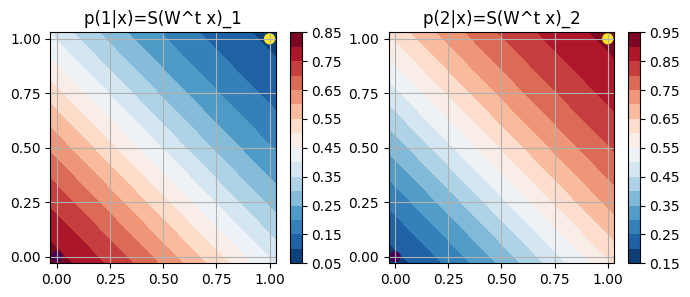

In [4]:
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ones(50*50), np.ravel(x1), np.ravel(x2)]
Z = np.apply_along_axis(np.exp, 1, XX @ W); Z = Z/Z.sum(axis=1, keepdims=True)
_, axs = plt.subplots(1, 2, figsize=(8, 3))
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(0., 1, 5)); ax.set_yticks(np.linspace(0., 1, 5));
    ax.grid(); ax.set_title(f'p({i+1}|x)=S(W^t x)_{i+1}')
    cp = ax.contourf(x1, x2, Z[:, i].reshape(x1.shape), 15, cmap='RdBu_r')
    plt.colorbar(cp, ax=ax); ax.scatter(*X[:,1:].T, c=range(1,C+1), s=50);